In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sub_funcs import *
from slmsuite.hardware.cameras.alliedvision import AlliedVision

AlliedVision serials:
"0441G"
Looking for cameras... success
vimba sn 0441G initializing... success
Image shape: (3036, 4024)
Exposure time: 100.0 us
Beam coordinates: (1785, 1146)
Max intensity: 112


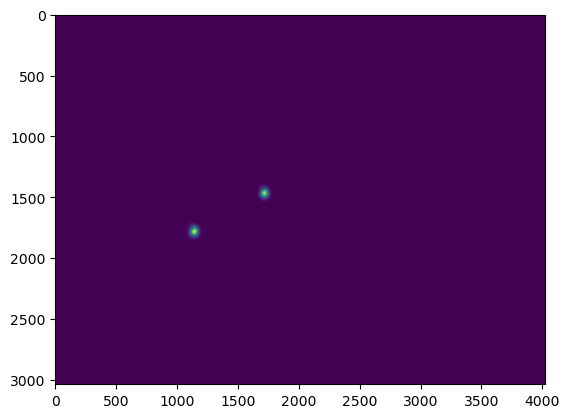

In [11]:
AlliedVision.info(verbose=True)
cam = AlliedVision(serial="0441G", verbose=True)

t_exp_s = 1e-4
cam.set_exposure(t_exp_s)

# ROI = [1035,100,1443,100]                                           #ROI = [x, width, y, height]

im = cam.get_image()
# imc = crop(im, ROI)

plt.imshow(im)

print('Image shape:', cam.default_shape)
print('Exposure time:', np.round(t_exp_s*1e6,0),'us')
print('Beam coordinates:', np.unravel_index(np.argmax(im, axis=None), im.shape))
print('Max intensity:', np.max(im))

In [4]:
# x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
# intensity_matrix = 2*np.exp(-(x+1)**2 - y**2) + 1*np.exp(-(x-1)**2 - (y-2)**2)


# peaks = peak_detection(intensity_matrix, threshold_abs= 0)
# y_coords, x_coords = zip(*peaks)

# # Plot the intensity matrix with identified peaks
# plt.figure(figsize=(8, 6))
# plt.imshow(intensity_matrix, cmap='viridis', origin='lower')
# plt.scatter(x_coords,y_coords, color='red', marker='x', label='Peaks')
# plt.colorbar(label='Intensity')
# plt.title('Intensity Matrix with Identified Peaks')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()

# print("The peaks are : {}".format(peaks))

# # test optimization 
# param = fit_gaussian_2d(intensity_matrix=intensity_matrix, peaks_coords=peaks, ROI_radius=10)
# print(param)

The peaks y,x coordinates are [[1786 1145]
 [1471 1725]]


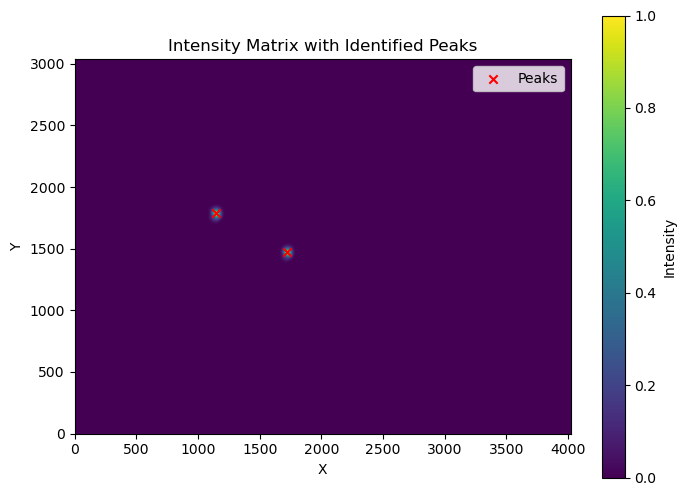

In [10]:
# Generate example intensity matrix with two Gaussian spots
# Replace this with your actual intensity matrix
# x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
# intensity_matrix = 2*np.exp(-x**2 - y**2) + 1*np.exp(-(x-2)**2 - (y-2)**2)

intensity_matrix = im

peaks = peak_detection(intensity_matrix, min_distance= 500, threshold_abs= 0)
y_coords, x_coords = zip(*peaks)
gaussian_params = fit_gaussian_2d(intensity_matrix, peaks_coords=peaks, ROI_radius=350)
write_gaussian_params_to_file(gaussian_params = gaussian_params, peaks=peaks, filename='matching_test.txt')

print("The peaks y,x coordinates are {}".format(peaks))
# Plot the intensity matrix with identified peaks
plt.figure(figsize=(8, 6))
plt.imshow(intensity_matrix, cmap='viridis', origin='lower')
plt.scatter(x_coords,y_coords, color='red', marker='x', label='Peaks')
plt.colorbar(label='Intensity')
plt.title('Intensity Matrix with Identified Peaks')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


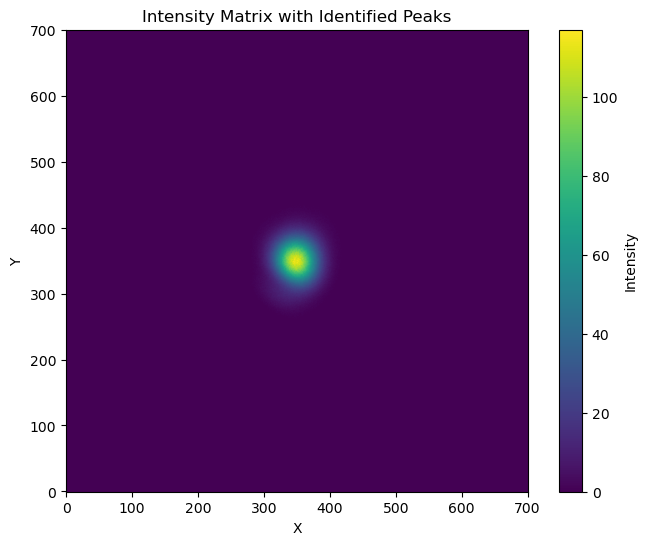

In [6]:

ROI_radius = 350
y0 = peaks[1][0]
x0 = peaks[1][1]


x_roi = np.arange(x0 - ROI_radius, x0 + ROI_radius + 1)
y_roi = np.arange(y0 - ROI_radius, y0 + ROI_radius + 1)
x_roi, y_roi = np.meshgrid(x_roi, y_roi)
z_roi = intensity_matrix[y_roi, x_roi]  

plt.figure(figsize=(8, 6))
plt.imshow(z_roi, cmap='viridis', origin='lower')
plt.colorbar(label='Intensity')
plt.title('Intensity Matrix with Identified Peaks')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
while(True):
    intensity_matrix = cam.get_image()
    peaks = peak_detection(intensity_matrix, min_distance= 500, threshold_abs= 0)
    gaussian_params = fit_gaussian_2d(intensity_matrix, peaks_coords=peaks, ROI_radius=250)
    write_gaussian_params_to_file(gaussian_params = gaussian_params, peaks=peaks, filename='black_radiant_expo_1e-4_hammer.txt')
    time.sleep(5)


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.